In [1]:
# Importing few libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATASET = "/content/drive/My Drive/CommonFiles/MUSA650-Data/Prj_EuroSat/EuroSAT_RGB_SmallSet"

LABELS = os.listdir(DATASET)
print(LABELS)

['SeaLake', 'Highway', 'Residential', 'Forest', 'AnnualCrop']


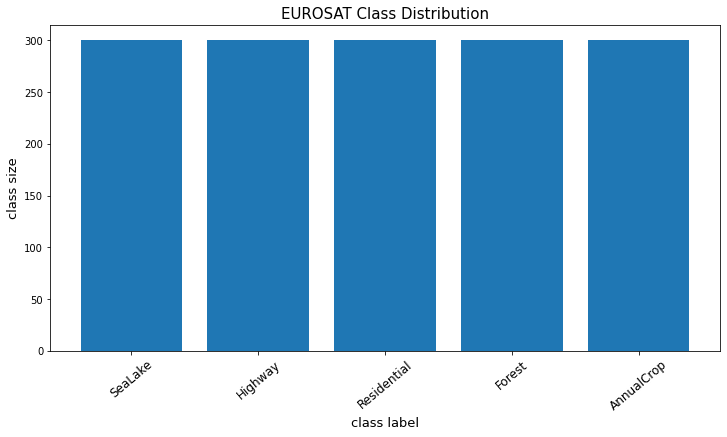

In [4]:
# plot class distributions of whole dataset
counts = {}

for l in LABELS:
    counts[l] = len(os.listdir(os.path.join(DATASET, l)))

    
plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15);

In [17]:
## Read images
classNames = os.listdir(DATASET)
numClass = len(classNames)
numClass = 2

In [18]:
lenClass = np.zeros(numClass)
for i in np.arange(0, numClass):
  lenClass[i] = len(os.listdir(DATASET + '/' + classNames[i]))
lenClass

array([300., 300.])

In [19]:
numImg  = int(lenClass.sum())

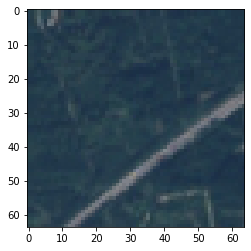

In [20]:
imgSel = DATASET + '/' + classNames[i] + '/' + os.listdir(DATASET + '/' + classNames[i])[3]
img = PIL.Image.open(imgSel, 'r')
plt.imshow(np.asarray(img))

In [21]:
np.asarray(img).shape

(64, 64, 3)

In [22]:
numPixels = np.prod(np.asarray(img).shape)

In [23]:
X = np.zeros([numImg, numPixels])
y = np.zeros(numImg)

In [24]:
imgInd=0
for i in np.arange(0, numClass):
  className = classNames[i]
  for imgName in os.listdir(DATASET + '/' + className):
    img = PIL.Image.open(DATASET + '/' + className + '/' + imgName, 'r')
    imgVec = np.asarray(img).flatten()
    X[imgInd,:] = imgVec
    y[imgInd] = i
    imgInd = imgInd + 1
    print('Read img class ' + className + ' no ' + str(imgInd))


Read img class SeaLake no 1
Read img class SeaLake no 2
Read img class SeaLake no 3
Read img class SeaLake no 4
Read img class SeaLake no 5
Read img class SeaLake no 6
Read img class SeaLake no 7
Read img class SeaLake no 8
Read img class SeaLake no 9
Read img class SeaLake no 10
Read img class SeaLake no 11
Read img class SeaLake no 12
Read img class SeaLake no 13
Read img class SeaLake no 14
Read img class SeaLake no 15
Read img class SeaLake no 16
Read img class SeaLake no 17
Read img class SeaLake no 18
Read img class SeaLake no 19
Read img class SeaLake no 20
Read img class SeaLake no 21
Read img class SeaLake no 22
Read img class SeaLake no 23
Read img class SeaLake no 24
Read img class SeaLake no 25
Read img class SeaLake no 26
Read img class SeaLake no 27
Read img class SeaLake no 28
Read img class SeaLake no 29
Read img class SeaLake no 30
Read img class SeaLake no 31
Read img class SeaLake no 32
Read img class SeaLake no 33
Read img class SeaLake no 34
Read img class SeaLake 

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state=42)


In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#svc = SVC(kernel='rbf')
svc = SVC()

print('Train size: ' + str(y_train.shape[0]))

### Training the model
print('Training the model ...')
svc.fit(X_train, y_train)

print('Applying the model ...')
yPred = svc.predict(X_test)

print( 'Accuracy: ' + str(100 * np.sum(yPred==y_test) / y_test.shape[0]))

Train size: 360
Training the model ...
Applying the model ...
Accuracy: 97.08333333333333


## k-Fold Cross-Validation (CV)

In [42]:
NUM_FOLD = 4 

from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

yPredAll = np.zeros(y.shape[0])
accAll = np.zeros(NUM_FOLD)

svc = SVC(kernel='linear')

indFold = 0
for train_index, test_index in kf.split(X):

    XTrain   = X[train_index]
    yTrain = y[train_index]

    XTest    = X[test_index]
    yTest  = y[test_index]

    ### Training the model
    print('Training the model for fold: ' + str(indFold))
    svc.fit(XTrain, yTrain)

    yPred = svc.predict(XTest)

    # accuracy for the current fold only    
    accFold = np.sum(yPred==yTest) / yTest.shape[0]
    accAll[indFold] = accFold
    print('  Acc : ' + str(accFold))
    
    yPredAll[test_index] = yPred

    indFold = indFold + 1

# Average accuracy over all folds
accAvg = np.mean(accAll)
print('Avg Acc. :' + str(accAvg))

acc =  np.sum(y==yPredAll) / y.shape[0]
print('Acc. for the combined folds :' + str(acc))


Training the model for fold: 0
  Acc : 0.9066666666666666
Training the model for fold: 1
  Acc : 0.9933333333333333
Training the model for fold: 2
  Acc : 0.32666666666666666
Training the model for fold: 3
  Acc : 0.2733333333333333
Avg Acc. :0.625
Acc. for the combined folds :0.625
